In [ ]:
TASK 3:
    
CUSTOMER CHURNPREDICTION
Develop a model to predict customer churn for a subscription-based service or business. 
Use historical customer data, includingfeatures like usage behavior and customer 
demographics, and try algorithms like Logistic Regression, Random Forests, or 
GradientBoosting to predict churn.

In [1]:
import pandas as pd
df = pd.read_csv('Churn_Modelling.csv')
print(df.shape)
df.head(5)

(10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [2]:
df.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [3]:
df.duplicated().sum() # Delete the duplicate, if any

0

In [4]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# Drop 'RowNumber and CustomerId' column

In [3]:
df.drop(['RowNumber','CustomerId'],axis='columns', inplace=True)
print(df.isnull().sum())
df.head()

Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Encode column 'Surname'

In [6]:
df['Surname'].value_counts()

Surname
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: count, Length: 2932, dtype: int64

In [7]:
df['Surname'].isnull().sum()

0

In [4]:
# preprocess the column berfore applying label encoder

df['Surname'] = df['Surname'].str.lower()

df['Surname'] = df['Surname'].str.strip()

df['Surname'] = df['Surname'].str.replace(" ", "_")
df['Surname'] = df['Surname'].str.replace(".", "")
df['Surname'] = df['Surname'].str.replace(",", "")
df['Surname'] = df['Surname'].str.replace("-", "_")

df['Surname'] = df['Surname'].str.strip()


In [10]:
df

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Surname'] = label_encoder.fit_transform(df['Surname'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Surname          10000 non-null  int32  
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(2), int32(1), int64(7), object(2)
memory usage: 898.6+ KB


In [11]:
df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1115,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,1177,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,2039,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,289,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,1821,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Geography and Gender Column

In [12]:
df['Geography'].value_counts() 

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [13]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [6]:
# first convet the column into 'category' data type

df['Geography'] = df['Geography'].astype('category')
df['Geography'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: Geography
Non-Null Count  Dtype   
--------------  -----   
10000 non-null  category
dtypes: category(1)
memory usage: 10.0 KB


In [7]:
# first convet the column into 'category' data type

df['Gender'] = df['Gender'].astype('category')
df['Gender'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: Gender
Non-Null Count  Dtype   
--------------  -----   
10000 non-null  category
dtypes: category(1)
memory usage: 10.0 KB


In [8]:
# preprocess the column berfore conveting into machine laearning language

df['Geography'] = df['Geography'].str.lower()
df['Gender'] = df['Gender'].str.lower()

df['Geography'] = df['Geography'].str.strip()
df['Gender'] = df['Gender'].str.strip()

df['Geography'] = df['Geography'].str.replace(" ", "_")
df['Gender'] = df['Gender'].str.replace(" ", "_")

df['Geography'] = df['Geography'].str.replace(".", "")
df['Gender'] = df['Gender'].str.replace(".", "")

df['Geography'] = df['Geography'].str.replace(",", "")
df['Gender'] = df['Gender'].str.replace(",", "")

df['Geography'] = df['Geography'].str.replace("-", "_")
df['Gender'] = df['Gender'].str.replace("-", "_")

df['Geography'] = df['Geography'].str.strip()
df['Gender'] = df['Gender'].str.strip()


In [17]:
df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1115,619,france,female,42,2,0.00,1,1,1,101348.88,1
1,1177,608,spain,female,41,1,83807.86,1,0,1,112542.58,0
2,2039,502,france,female,42,8,159660.80,3,1,0,113931.57,1
3,289,699,france,female,39,1,0.00,2,0,0,93826.63,0
4,1821,850,spain,female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
# Apply Pd.get_dummies function on geography column

import pandas as pd

df_Geography = pd.get_dummies(df['Geography'])
print(df_Geography)

      france  germany  spain
0       True    False  False
1      False    False   True
2       True    False  False
3       True    False  False
4      False    False   True
...      ...      ...    ...
9995    True    False  False
9996    True    False  False
9997    True    False  False
9998   False     True  False
9999    True    False  False

[10000 rows x 3 columns]


In [10]:
# Apply Pd.get_dummies function on gender column

df_Gender = pd.get_dummies(df['Gender'])
df_Gender

,female,male
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False
...,...,...
9995,False,True
9996,False,True
9997,True,False
9998,False,True


In [11]:
# Concatenate data 
print(df.shape)
print()
df = pd.concat([df,df_Geography], axis =1)
print(df.shape)
print()
df = pd.concat([df,df_Gender], axis =1)
print(df.shape)

(10000, 12)

(10000, 15)

(10000, 17)


In [21]:
df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,france,germany,spain,female,male
0,1115,619,france,female,42,2,0.00,1,1,1,101348.88,1,True,False,False,True,False
1,1177,608,spain,female,41,1,83807.86,1,0,1,112542.58,0,False,False,True,True,False
2,2039,502,france,female,42,8,159660.80,3,1,0,113931.57,1,True,False,False,True,False
3,289,699,france,female,39,1,0.00,2,0,0,93826.63,0,True,False,False,True,False
4,1821,850,spain,female,43,2,125510.82,1,1,1,79084.10,0,False,False,True,True,False


In [12]:
# drop the Geography column 

df.drop('Geography', axis =1, inplace=True)
df.drop('Gender', axis =1, inplace=True)

In [13]:
df.shape

(10000, 15)

In [24]:
df.head()

,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,france,germany,spain,female,male
0,1115,619,42,2,0.00,1,1,1,101348.88,1,True,False,False,True,False
1,1177,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True,True,False
2,2039,502,42,8,159660.80,3,1,0,113931.57,1,True,False,False,True,False
3,289,699,39,1,0.00,2,0,0,93826.63,0,True,False,False,True,False
4,1821,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True,True,False


In [14]:
df['IsActiveMember'] = df['IsActiveMember'].astype('category')
df['NumOfProducts'] = df['NumOfProducts'].astype('category')
df['HasCrCard'] = df['HasCrCard'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Surname          10000 non-null  int32   
 1   CreditScore      10000 non-null  int64   
 2   Age              10000 non-null  int64   
 3   Tenure           10000 non-null  int64   
 4   Balance          10000 non-null  float64 
 5   NumOfProducts    10000 non-null  category
 6   HasCrCard        10000 non-null  category
 7   IsActiveMember   10000 non-null  category
 8   EstimatedSalary  10000 non-null  float64 
 9   Exited           10000 non-null  int64   
 10  france           10000 non-null  bool    
 11  germany          10000 non-null  bool    
 12  spain            10000 non-null  bool    
 13  female           10000 non-null  bool    
 14  male             10000 non-null  bool    
dtypes: bool(5), category(3), float64(2), int32(1), int64(4)
memory usage: 586.5 KB


In [26]:
df.isnull().sum()

Surname            0
CreditScore        0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
france             0
germany            0
spain              0
female             0
male               0
dtype: int64

# seperate x and y from df

In [15]:
x = df.drop('Exited',axis=1)
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Surname          10000 non-null  int32   
 1   CreditScore      10000 non-null  int64   
 2   Age              10000 non-null  int64   
 3   Tenure           10000 non-null  int64   
 4   Balance          10000 non-null  float64 
 5   NumOfProducts    10000 non-null  category
 6   HasCrCard        10000 non-null  category
 7   IsActiveMember   10000 non-null  category
 8   EstimatedSalary  10000 non-null  float64 
 9   france           10000 non-null  bool    
 10  germany          10000 non-null  bool    
 11  spain            10000 non-null  bool    
 12  female           10000 non-null  bool    
 13  male             10000 non-null  bool    
dtypes: bool(5), category(3), float64(2), int32(1), int64(3)
memory usage: 508.4 KB


In [16]:
y = df['Exited']
y = y.astype('category')
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: Exited
Non-Null Count  Dtype   
--------------  -----   
10000 non-null  category
dtypes: category(1)
memory usage: 10.0 KB


In [29]:
from sklearn.model_selection import  train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.20)

In [30]:
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

8000
8000
2000
2000


# Check Class Imbalance in the target variable

In [19]:
y_train.value_counts()

Exited
0    6377
1    1623
Name: count, dtype: int64

In [31]:
# There is a class imbalance so apply SMOTE analysis

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=50)

x_train, y_train = smote.fit_resample(x_train, y_train)

print(x_train.shape)
y_train.value_counts()

(12716, 14)


Exited
0    6358
1    6358
Name: count, dtype: int64

In [32]:
x.isna().sum()
y.isna().sum()

0

In [33]:
x.isnull().sum()

Surname            0
CreditScore        0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
france             0
germany            0
spain              0
female             0
male               0
dtype: int64

In [37]:
x.shape

(10000, 14)

# Apply Standard Scaler to scale the values between same range

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

print(x_train.shape)
x_test.shape

(12716, 14)


(2000, 14)

In [35]:
import numpy as np
np.count_nonzero(np.isnan(x_train))

6372

In [36]:
x_train = np.where(np.isnan(x_train), np.nanmedian(x_train, axis=0),x_train)

In [37]:
nan_count_x_train = np.count_nonzero(np.isnan(x_train))
nan_count_x_train

0

# Apply PCA for dimentionality reduction

In [38]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.99)

pca.fit(x_train)
x_train = pca.transform(x_train)
x_test = pca.transform(x_test)

print(x_train.shape)
print(x_test.shape)

(12716, 14)
(2000, 14)


# Apply Random Forest Classifier

In [39]:
from sklearn.ensemble import RandomForestClassifier

model_rfc = RandomForestClassifier()
model_rfc

RandomForestClassifier()

In [40]:
# Train the model

model_rfc.fit(x_train,y_train)

RandomForestClassifier()

In [41]:
# model training and testing score

training_score = model_rfc.score(x_train,y_train)
print('model training score: ',training_score)
testing_score = model_rfc.score(x_test,y_test)
print('model training score: ',testing_score)

model training score:  1.0
model training score:  0.843


In [42]:
# model predicted values

model_pred = model_rfc.predict(x_test)

In [43]:
# Model accuracy Score

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(model_pred,y_test)
print('Accuracy Score: ', accuracy)

Accuracy Score:  0.843


              precision    recall  f1-score   support

           0       0.92      0.89      0.90      1665
           1       0.53      0.62      0.57       335

    accuracy                           0.84      2000
   macro avg       0.72      0.75      0.74      2000
weighted avg       0.85      0.84      0.85      2000


[[1478  187]
 [ 127  208]]


<Axes: >

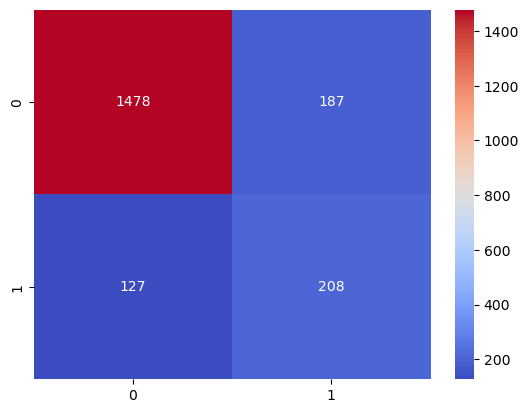

In [44]:
# Classification Report

from sklearn.metrics import accuracy_score, confusion_matrix , classification_report

cr = classification_report(model_pred,y_test)
print(cr)
print()

# Heatmap of the confusion matrix

import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(model_pred,y_test)
print(cm)

sns.heatmap(cm,annot=True,fmt='d',cmap='coolwarm')

# Apply Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()

model_lr.fit(x_train,y_train)

LogisticRegression()

In [46]:
print("model training score: ",model_lr.score(x_train,y_train))
print("model testing score: ",model_lr.score(x_test,y_test))

model training score:  0.8446052217678516
model testing score:  0.8085


In [47]:
model_predicted_lr = model_lr.predict(x_test)

In [48]:

from sklearn.metrics import accuracy_score, confusion_matrix , classification_report

print("model accuracy score: ", accuracy_score(model_predicted_lr,y_test))
print()

cr = classification_report(model_predicted_lr,y_test)
print(cr)
print()

model accuracy score:  0.8085

              precision    recall  f1-score   support

           0       0.90      0.86      0.88      1680
           1       0.42      0.52      0.46       320

    accuracy                           0.81      2000
   macro avg       0.66      0.69      0.67      2000
weighted avg       0.83      0.81      0.82      2000




              precision    recall  f1-score   support

           0       0.90      0.86      0.88      1680
           1       0.42      0.52      0.46       320

    accuracy                           0.81      2000
   macro avg       0.66      0.69      0.67      2000
weighted avg       0.83      0.81      0.82      2000


[[1451  229]
 [ 154  166]]


<Axes: >

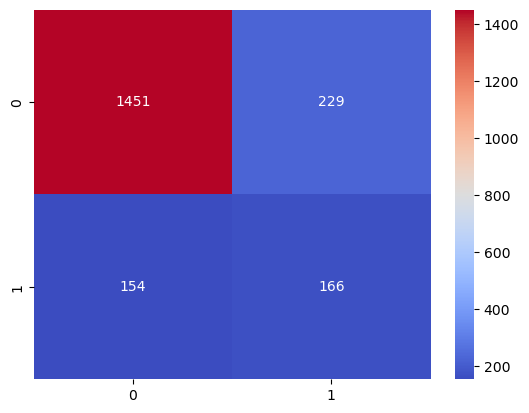

In [49]:
# Classification Report

from sklearn.metrics import accuracy_score, confusion_matrix , classification_report

cr = classification_report(model_predicted_lr,y_test)
print(cr)
print()

# Heatmap of the confusion matrix

import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(model_predicted_lr,y_test)
print(cm)

sns.heatmap(cm,annot=True,fmt='d',cmap='coolwarm')

# Apply Gradient Boosting

In [50]:
from sklearn.ensemble import GradientBoostingClassifier

model_gbc = GradientBoostingClassifier()
model_gbc

GradientBoostingClassifier()

In [51]:
# train model

model_gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [52]:
# model training and testing score

training_score = model_gbc.score(x_train,y_train)
testing_score = model_gbc.score(x_test,y_test)
print('model training score: ',training_score )
print('model testing score: ',testing_score)

model training score:  0.8932054105064485
model testing score:  0.8425


In [53]:
# model prediction

model_pred_gb = model_gbc.predict(x_test)

In [54]:
# model accuracy score

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(model_pred,y_test)

print('model accuracy score is: ',accuracy)

model accuracy score is:  0.843


              precision    recall  f1-score   support

           0       0.92      0.89      0.90      1665
           1       0.53      0.62      0.57       335

    accuracy                           0.84      2000
   macro avg       0.72      0.75      0.74      2000
weighted avg       0.85      0.84      0.85      2000


[[1478  187]
 [ 127  208]]


<Axes: >

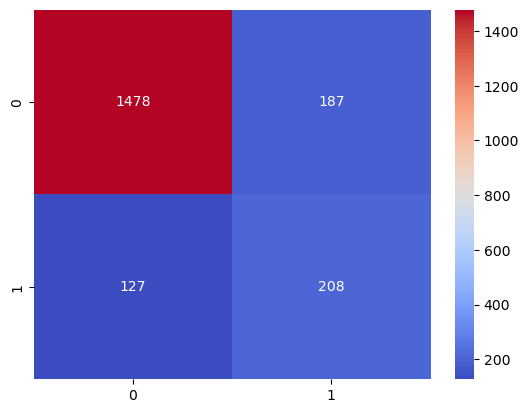

In [55]:
# Classification Report

from sklearn.metrics import accuracy_score, confusion_matrix , classification_report

cr = classification_report(model_pred,y_test)
print(cr)
print()

# Heatmap of the confusion matrix

import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(model_pred,y_test)
print(cm)

sns.heatmap(cm,annot=True,fmt='d',cmap='coolwarm')

# Thank You :)